IMPORTANDO DADOS

In [4]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
%matplotlib
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

import sweetviz as sv

Using matplotlib backend: QtAgg


In [5]:
treino = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

In [6]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


ANALISE EXPLORATÓRIA

                                             |          | [  0%]   00:00 -> (? left)


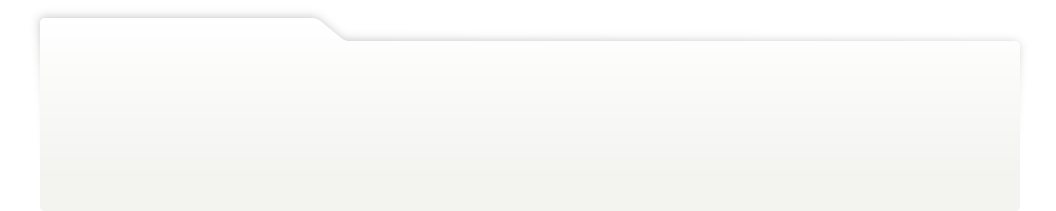
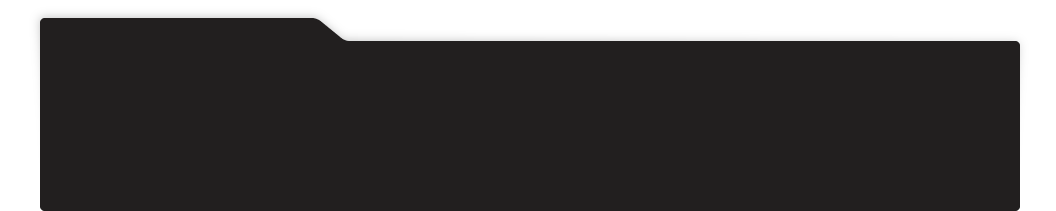
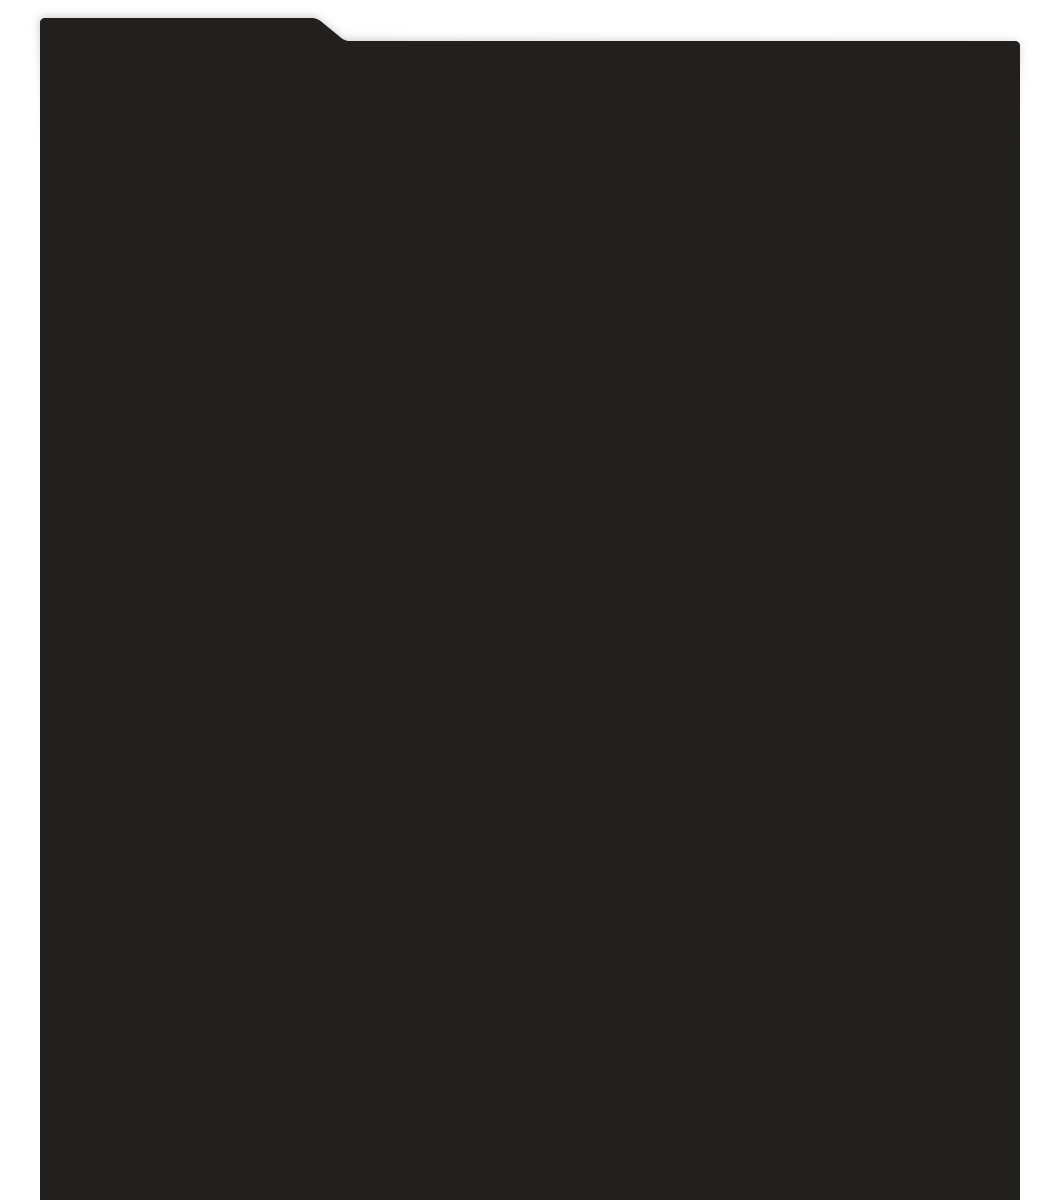
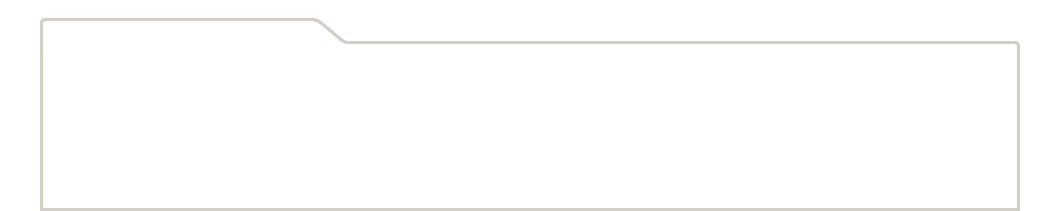
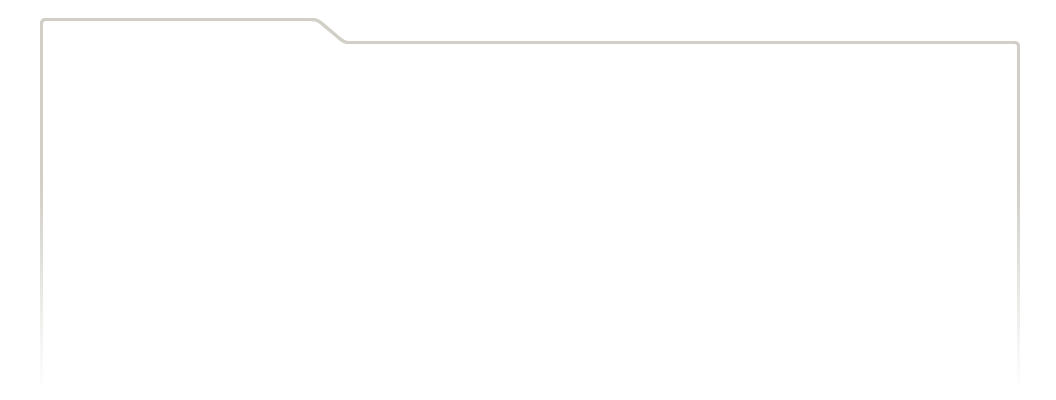
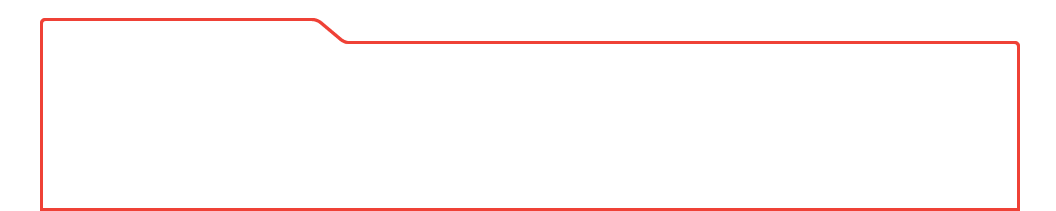
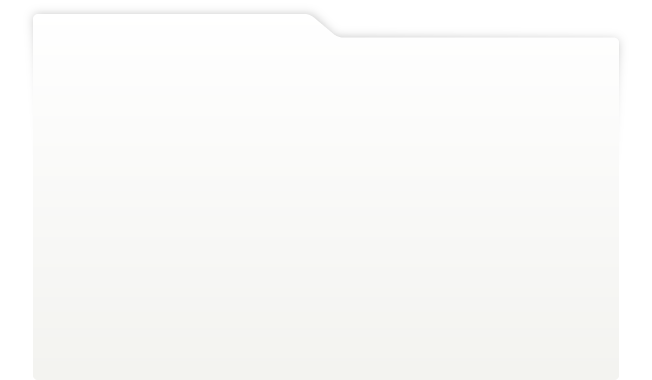
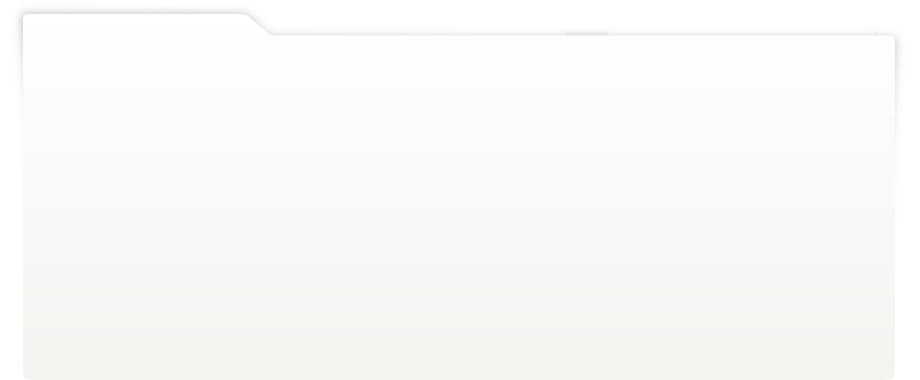
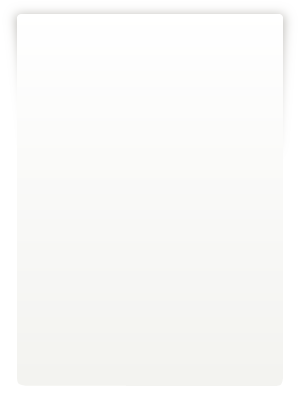
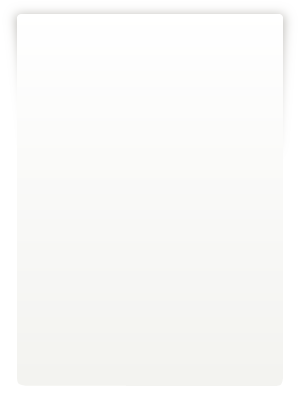
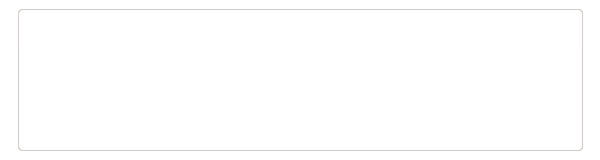
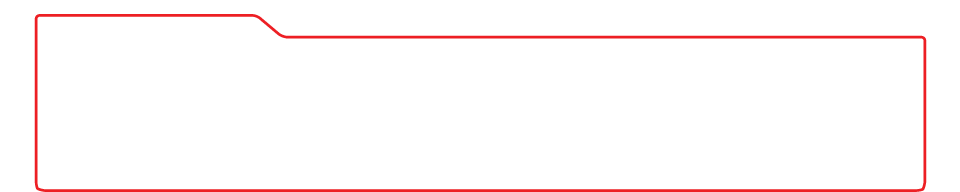
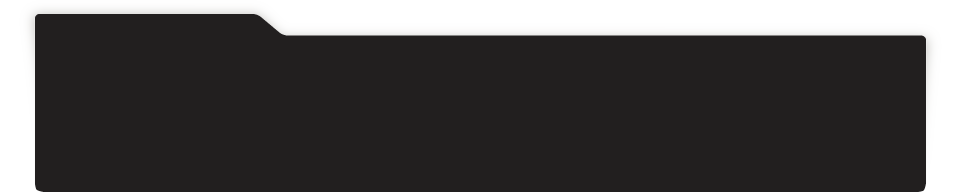
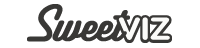
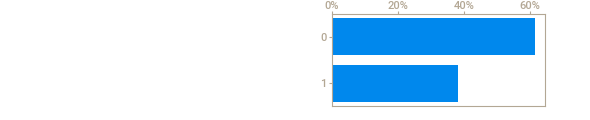
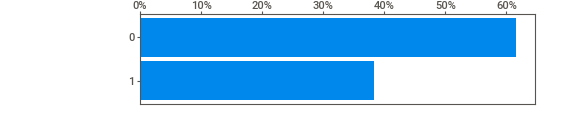
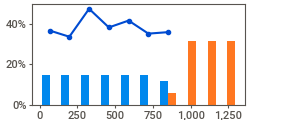
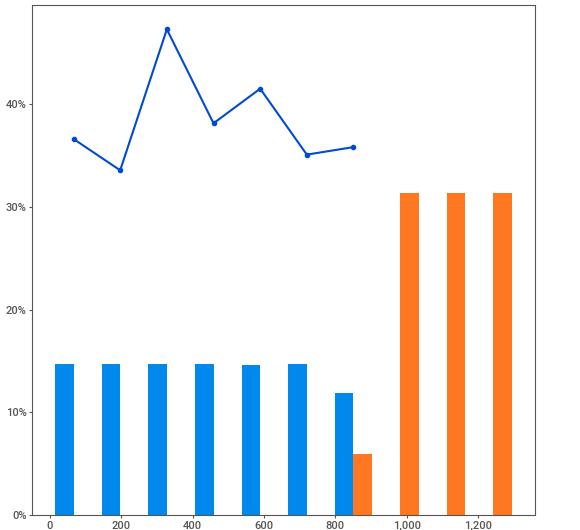
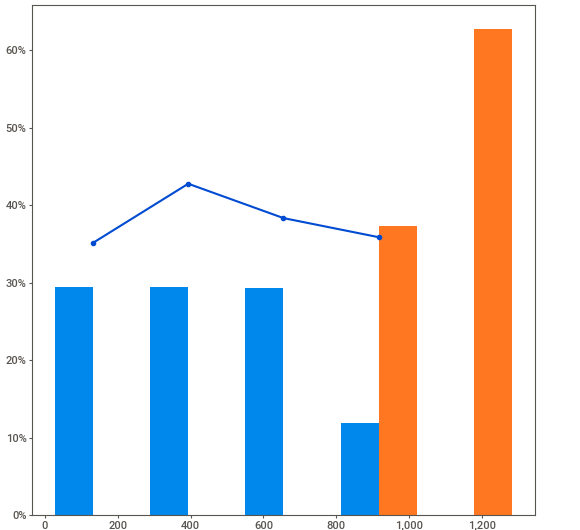
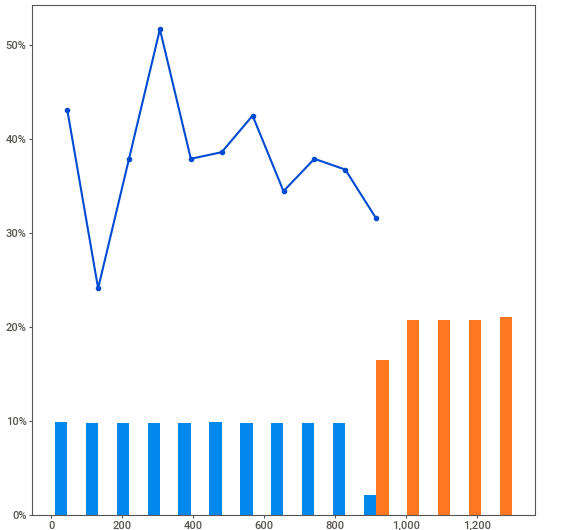
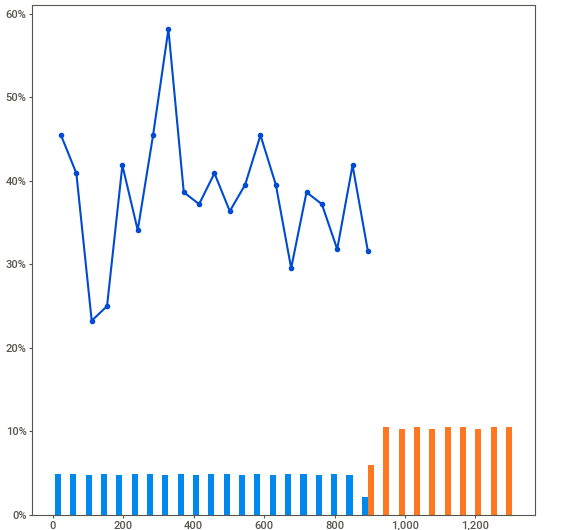
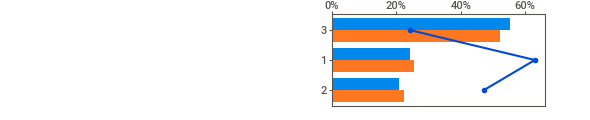
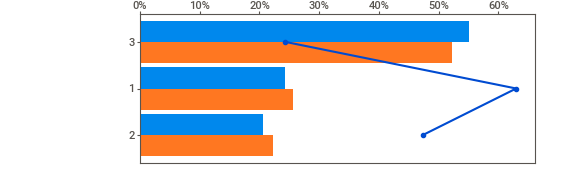
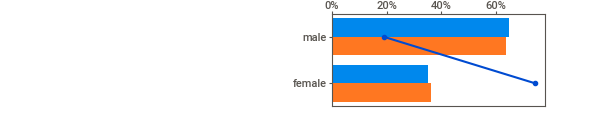
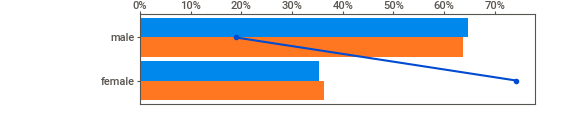
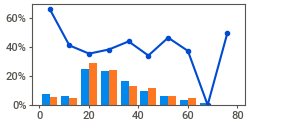
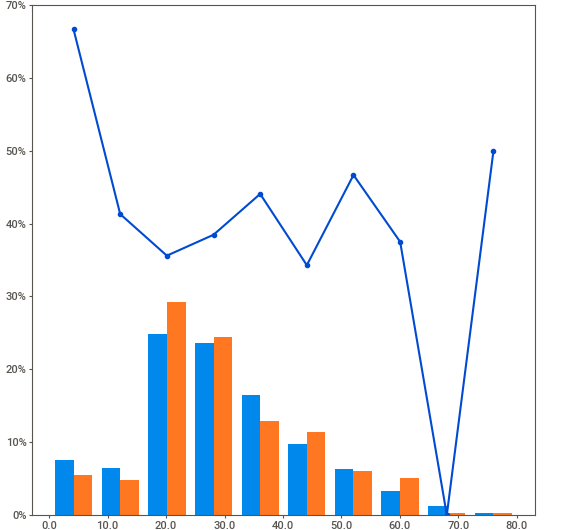
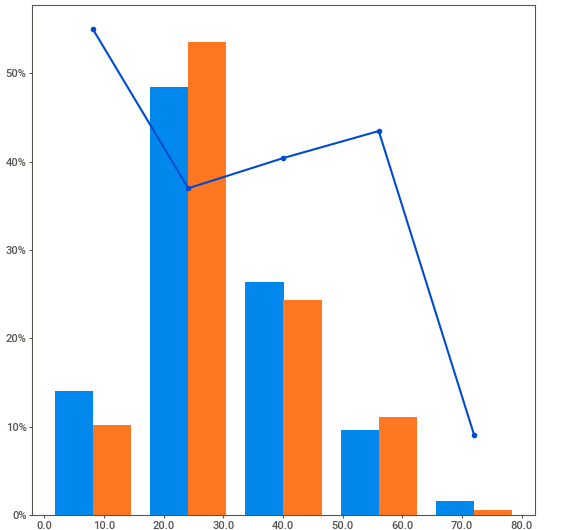
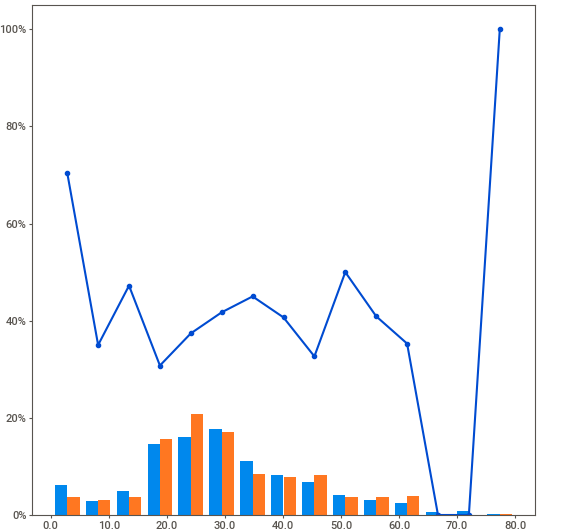
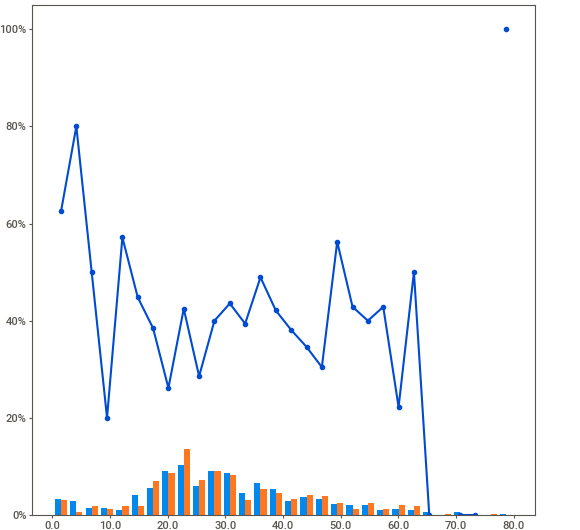
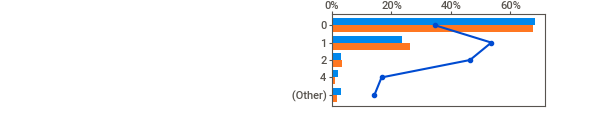
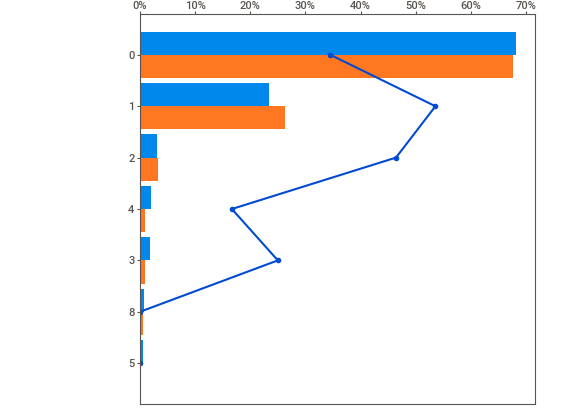
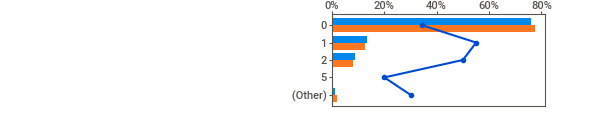
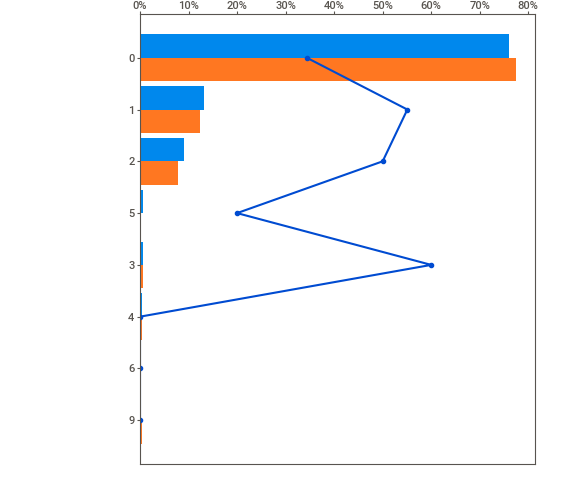
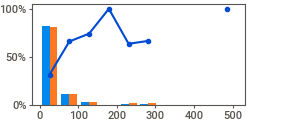
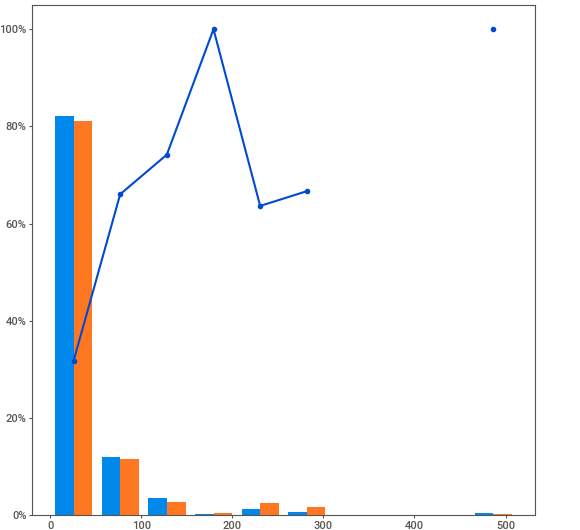
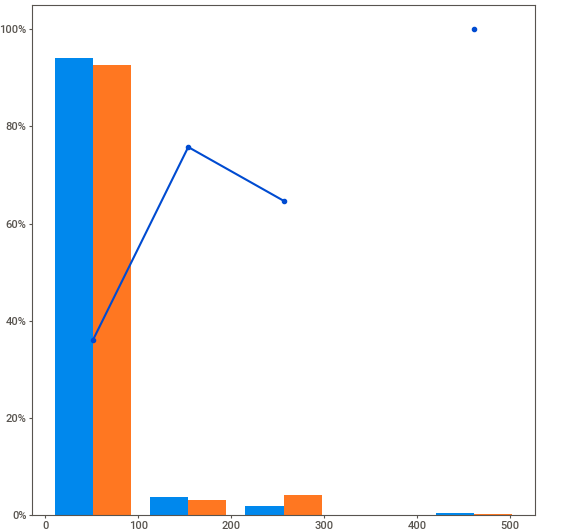
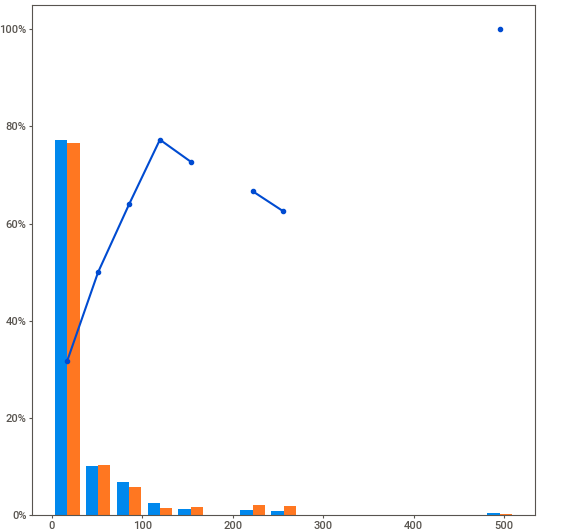
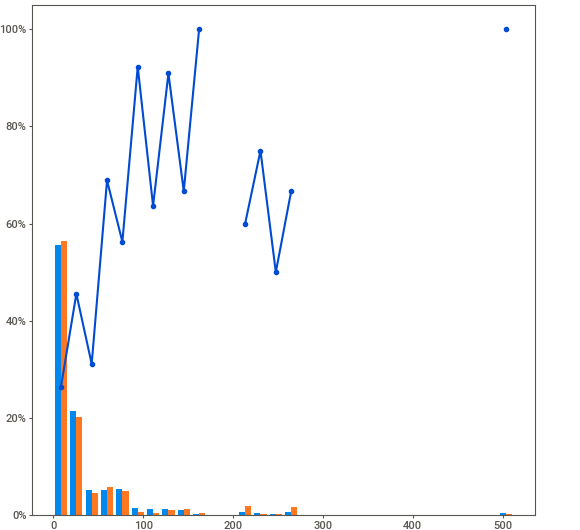
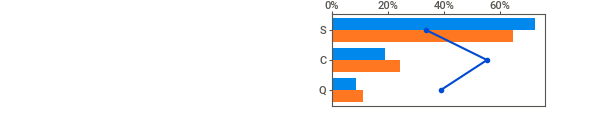
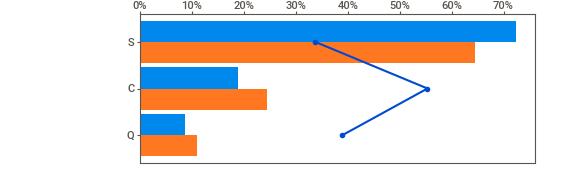
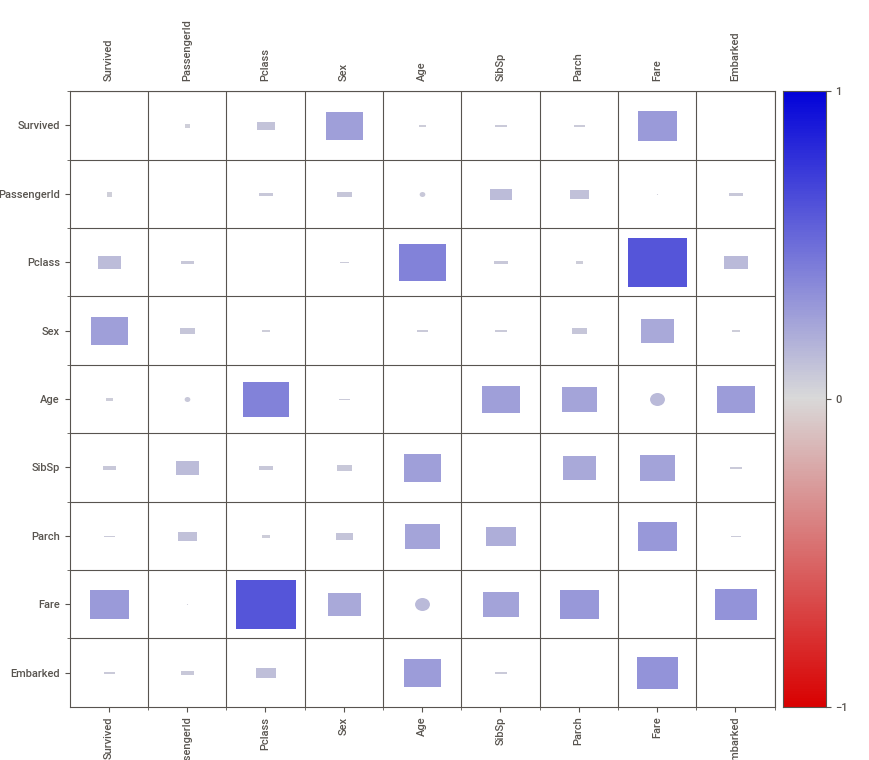
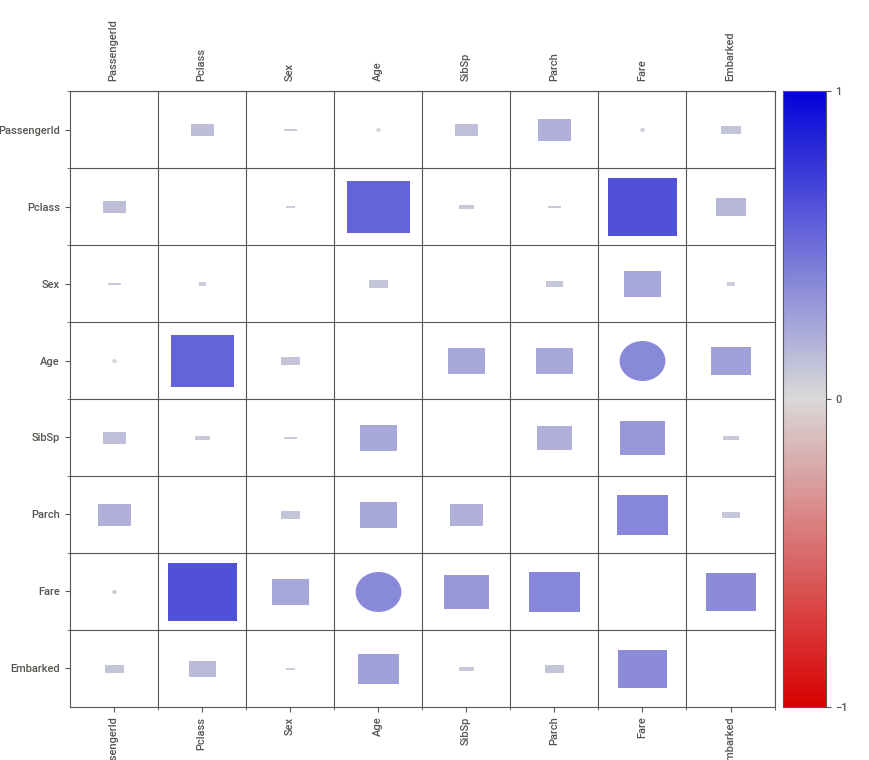

In [9]:
anex = sv.compare([treino,'Treino'],[teste,'Teste'],target_feat='Survived')
anex.show_notebook(layout='vertical', w=900, h=800, scale = 0.8)

DEFININDO VARIAVEIS

In [10]:
modelo = LogisticRegression()

variaveis = ['Sexo', 'Age','Pclass','SibSp','Fare','Porta','Miss','Mrs','Master','Col','Major','Mr']


TRANSFORMANDO VALORES

In [11]:
def transform(valor):
    if valor == 'female':
        return 1
    else:
        return 0

treino['Sexo'] = treino['Sex'].map(transform)
teste['Sexo'] = teste['Sex'].map(transform)

In [12]:
def transform2(valor):
    if valor =='S':
        return 1
    if valor =='C':
        return 2
    if valor =='Q':
        return 3

treino['Porta'] = treino['Embarked'].map(transform2)
teste['Porta'] = teste['Embarked'].map(transform2)

In [13]:
treino['Miss'] = treino['Name'].str.contains("Miss").astype(int)
treino['Mrs'] = treino['Name'].str.contains("Mrs").astype(int)
treino['Master'] = treino['Name'].str.contains("Master").astype(int)
treino['Col'] = treino['Name'].str.contains("Col").astype(int)
treino['Major'] = treino['Name'].str.contains("Major").astype(int)
treino['Mr'] = treino['Name'].str.contains("Mr").astype(int)

teste['Miss'] = teste['Name'].str.contains("Miss").astype(int)
teste['Mrs'] = teste['Name'].str.contains("Mrs").astype(int)
teste['Master'] = teste['Name'].str.contains("Master").astype(int)
teste['Col'] = teste['Name'].str.contains("Col").astype(int)
teste['Major'] = teste['Name'].str.contains("Major").astype(int)
teste['Mr'] = teste['Name'].str.contains("Mr").astype(int)

In [14]:
x = treino[variaveis]
y = treino['Survived']

In [15]:
x=x.fillna(-1)

In [16]:
x.head()

,Sexo,Age,Pclass,SibSp,Fare,Porta,Miss,Mrs,Master,Col,Major,Mr
0,0,22.0,3,1,7.2500,1.0,0,0,0,0,0,1
1,1,38.0,1,1,71.2833,2.0,0,1,0,0,0,1
2,1,26.0,3,0,7.9250,1.0,1,0,0,0,0,0
3,1,35.0,1,1,53.1000,1.0,0,1,0,0,0,1
4,0,35.0,3,0,8.0500,1.0,0,0,0,0,0,1


CARREGANDO MODELO

In [18]:
modelo.fit(x,y)

LogisticRegression()

In [20]:
previsao = teste[variaveis]
previsao=previsao.fillna(-1)
previsao.head()

,Sexo,Age,Pclass,SibSp,Fare,Porta,Miss,Mrs,Master,Col,Major,Mr
0,0,34.5,3,0,7.8292,3,0,0,0,0,0,1
1,1,47.0,3,1,7.0000,1,0,1,0,0,0,1
2,0,62.0,2,0,9.6875,3,0,0,0,0,0,1
3,0,27.0,3,0,8.6625,1,0,0,0,0,0,1
4,1,22.0,3,1,12.2875,1,0,1,0,0,0,1


In [21]:
prev = modelo.predict(previsao)


In [23]:
submeter = pd.Series(prev,index=teste['PassengerId'],name='Survived')


In [24]:
submeter.to_csv("titanic_kaggle.csv", header=True)
